# Accumulated Local Effects examples
This script serves to demonstrate how the ale AccumulatedLocalEffects can be used.

## Importing the AccumulatedLocalEffects class

In [1]:
from ale import AccumulatedLocalEffects

## Importing the example data sets

In [2]:
import numpy as np

# Training data sets
X_train = np.load('data/EXAMPLE_X_train.npy')
y_train = np.load('data/EXAMPLE_y_train.npy')

# Test data sets
X_test = np.load('data/EXAMPLE_X_test.npy')
y_test = np.load('data/EXAMPLE_y_test.npy')

## Initializing the a regressor
Works best for histogram based gradient boosters, because they usually don't take too much time for fitting. The class should work for any regressor, particularly the following three were tested:
* [LightGBM regressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)
* [XGBoost regressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html)
* [sklearn HistGradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html)

In [3]:
from lightgbm import LGBMRegressor

# Parameters: https://lightgbm.readthedocs.io/en/latest/Parameters.html
reg = LGBMRegressor(objective='cross_entropy',
                    n_estimators=300,
                    num_leaves=100,
                    seed=1)

## Instance of the AccumulatedLocalEffects class

In [4]:
ALE = AccumulatedLocalEffects(reg=reg,
                              filename='plots/EXAMPLE',  # Location to storethe  figures at
                              X_train=X_train,
                              y_train=y_train,
                              num_illum=4,  # Number of positions used for illumination
                              num_wlen=16)  # Number of wavelengths used for illumination

## Obtaining the feature indices sorted by importance
... by sorting the total variations of the accumulated local effects function for the first illumination position.

In [5]:
ALE.feature_importance_indices(illum_pos=[1])

array([ 5,  1, 14,  4, 13,  9, 12,  6,  8, 11,  7,  3, 10,  2, 15,  0])

... by sorting the sum of total variations of the accumulated local effects function over all illumination positions.

In [6]:
ALE.feature_importance_indices(illum_pos=[0, 1, 2, 3])

array([ 1,  5, 14,  4, 13, 12,  9,  8,  6,  7, 11,  3, 10,  2, 15,  0])

## Plotting the ALE function
... for the features corresponding to the first illumination position, including the 0.1, 0.2, ..., 0.9 quantiles of the empirical distribution functions as x-axis ticks.

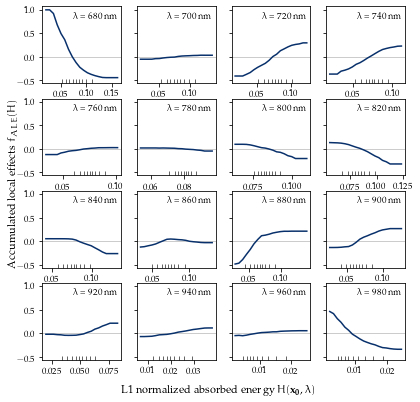

In [7]:
ALE.plot_ALE_function(illum_pos=[1])

... for each feature and illumination position.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


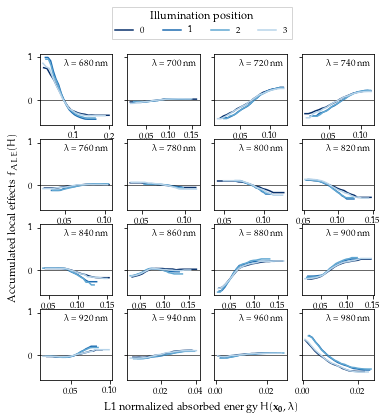

In [5]:
ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

## Plotting the 'feature clipping' MAE-progressions
... with the clipping orders 'importance' (features clipped according to the feature importance indices determined by looking at the first illumination position), and 'uniformal' (features clipped uniformally).

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


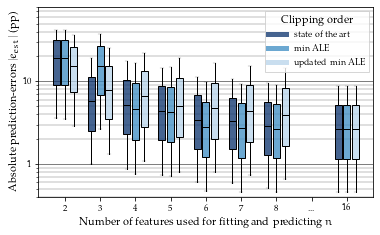

In [5]:
stats = ALE.plot_feature_clipping(X_test, 
                                  y_test,
                                  illum_pos=[1],
                                  clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                  n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

### Printing the statistics for the two clipping orders 
The `stats` array has the following shape:
* columns = {n=1 feature used, n=2 features used, ... , n=16 features used}
* rows = {this and all feature indices to the left were used, 10th percentile, 25th percentile, median, 75th percentile, 90th percentile}

Comparing the order in which features were removed in the two clipping orders.

In [10]:
print(stats['state_of_the_art'][0])
print(stats['min_ALE'][0])
print(stats['updated_min_ALE'][0])

[ 0. 13.  2. 11.  4.  9.  6.  7.]
[15.  2. 10.  3.  7. 11.  8.  5.]
[ 4. 12.  2. 10. 15.  8.  6.  5.]


Comparing the progression of the median absolute errors for the two clipping orders.

In [12]:
print(stats['state_of_the_art'][3])
print(stats['min_ALE'][3])
print(stats['updated_min_ALE'][3])

[19.37137439  5.71438351  5.22043877  4.38123564  3.44918614  3.34506465
  2.87979611  2.62622519]
[19.37803004 15.3000041   4.61844266  4.23177768  2.77570406  2.7197965
  2.66783487  2.62622519]
[15.53849299  7.93685279  6.60770945  5.00549325  4.72148062  4.35681789
  3.92884512  2.62622519]
